In [ ]:
import pandas as pd
import networkx as nx
import matplotlib
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

G = nx.read_gml('./woot')

In [186]:
def reverse(some_list):
    return [item[::-1] for item in some_list]

def print_reversed(dictionary):
    return [(key[::-1] , value) for (key, value) in sorted(dictionary.items() ,key=lambda x: x[1] ,reverse=True)]
    

In [187]:
pos = nx.spring_layout(G, k=1, scale=10000)

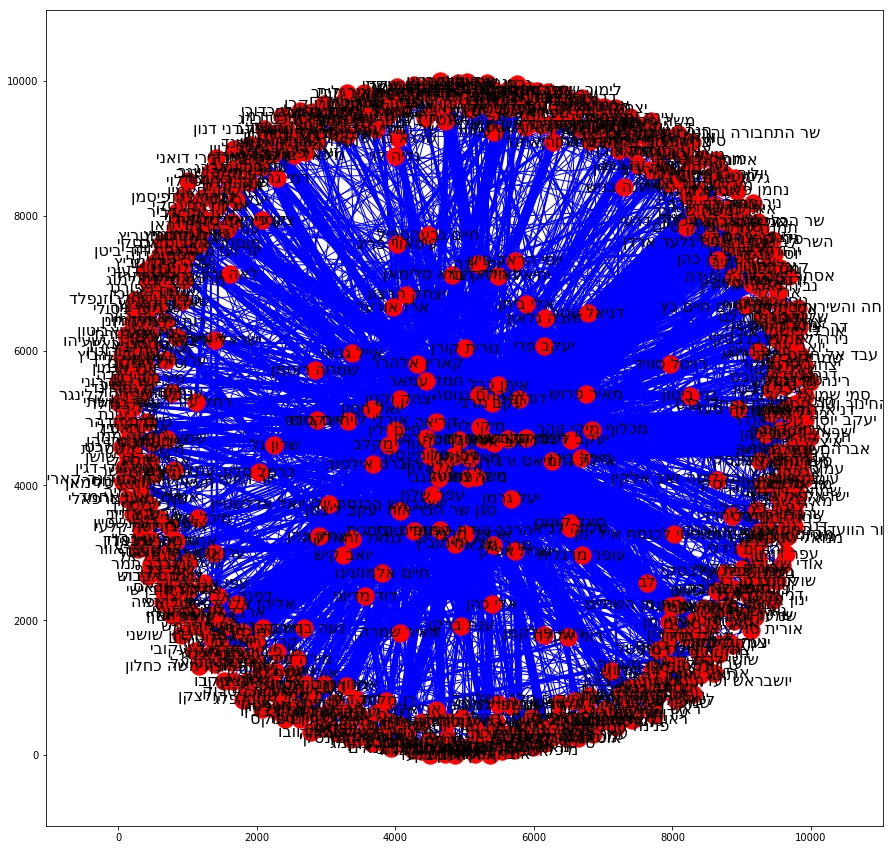

In [188]:
def draw_graph(G, arrows=False):
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=16)

    weights = set([])
    for n1,n2 in G.edges():
        weight = G.get_edge_data(n1,n2)['weight']
        weights.add(weight)

    for weight in weights:
        edges_with_weight = [edge for edge in G.edges() if weight == G.get_edge_data(*edge)['weight']]
        nx.draw_networkx_edges(G, pos, edgelist=edges_with_weight, width=weight, arrows=arrows, edge_color='b', arrow_style='->')

draw_graph(G)

In [52]:
# Degree (in and out)
# Betweeness centrality - the centrality of each node!
# Clustering coefficient - given subset of nodes, how much they relate one another
# common friends

# Degree of node:

In [189]:
print_reversed(G.degree())[:10]

[('איתן כבל', 130),
 ('יעקב מרגי', 123),
 ('דוד אמסלם', 120),
 ('ניסן סלומינסקי', 115),
 ('משה גפני', 113),
 ('אלי אלאלוף', 107),
 ('זאב אלקין', 106),
 ('קריאה', 89),
 ('אורי מקלב', 77),
 ('אברהם נגוסה', 73)]

In [190]:
print_reversed(nx.degree_centrality(G))[:10]

[('איתן כבל', 0.19637462235649547),
 ('יעקב מרגי', 0.18580060422960726),
 ('דוד אמסלם', 0.18126888217522658),
 ('ניסן סלומינסקי', 0.17371601208459214),
 ('משה גפני', 0.17069486404833836),
 ('אלי אלאלוף', 0.16163141993957703),
 ('זאב אלקין', 0.16012084592145015),
 ('קריאה', 0.13444108761329304),
 ('אורי מקלב', 0.1163141993957704),
 ('אברהם נגוסה', 0.11027190332326284)]

# Clustering coefficients.
Clustering coefficients means:
בהינתן קבוצה של אנשים מה חוזק הקשר של כל אחד מהאנשים לקבוצה

In [191]:
print_reversed(nx.clustering(G.to_undirected(), reverse(['דב חנין','עפר שלח', 'אחמד טיבי'])))

[('עפר שלח', 0.27450980392156865),
 ('אחמד טיבי', 0.26436781609195403),
 ('דב חנין', 0.20672268907563024)]

# Who talks about who

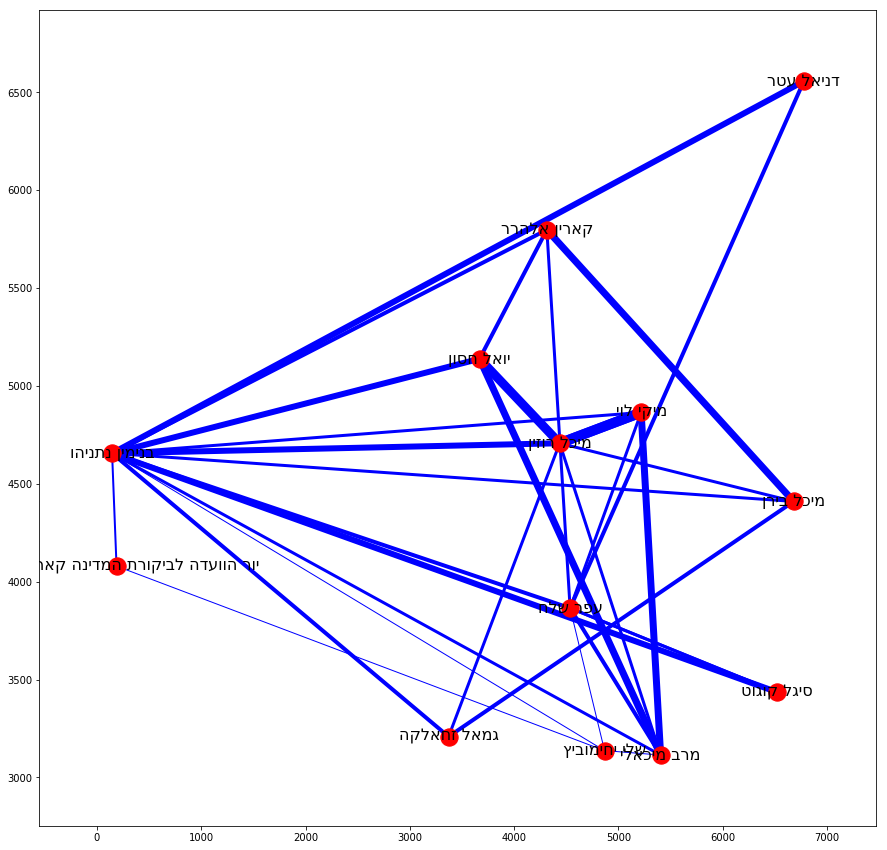

In [196]:
def draw_subgraph_of_node(some_node, arrows=False):
    some_node = some_node[::-1]
    neighbors = G.to_undirected().neighbors(some_node)
    neighbors.append(some_node)
    draw_graph(G.subgraph(neighbors), arrows)
    

draw_subgraph_of_node('בנימין נתניהו')